In [210]:
os.chdir('../../../Downloads/NewbornEEGData-20220203T094950Z-001/')

In [211]:
os.listdir()
os.chdir('NewbornEEGData')

In [213]:
os.chdir('BB5_Filtered (1-100)')

In [214]:
os.chdir('Silence (500)/')

In [215]:
babies = [5,6,9,11,12,13,16,17,18,19,21,25,30,33,34,35,37,39,40,45,47,49,52,53,56,57,58,60,62,63,65,66,67,68,69,71,14,20,22,27,28,29,31,41,46,64,70]
from matplotlib import cm
colors = cm.jet(np.linspace(0,1,len(babies)))

In [183]:
pwd

'C:\\Users\\Benedetta\\Downloads\\NewbornEEGData-20220203T094950Z-001\\NewbornEEGData\\BB5_Filtered (1-100)\\Silence (500)'

In [216]:
file = ('../../BB{}_Filtered (1-100)/Silence (500)/BB{} silence1 (continuous).mat').format(str(sub),str(sub))
scipy.io.loadmat(file)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Sep  9 12:04:46 2022',
 '__version__': '1.0',
 '__globals__': [],
 'eeg_rest': array([[-31.356504 , -31.40573  , -30.64483  , ...,  -5.953649 ,
         -10.429808 , -13.47952  ],
        [-32.25341  , -31.673634 , -30.473427 , ...,  -8.26452  ,
         -11.718295 , -15.0075865],
        [-76.33345  , -74.74958  , -72.738815 , ..., -14.918147 ,
         -20.860582 , -27.352806 ],
        ...,
        [-20.824541 , -19.57053  , -17.81562  , ...,   4.757623 ,
          -0.9757118,  -6.371112 ],
        [ 11.125786 ,  10.65607  ,  11.077871 , ...,  13.24089  ,
           7.0827465,   0.3524311],
        [  3.3903623,   4.422357 ,   7.1449594, ...,  38.16981  ,
          32.259037 ,  23.735271 ]], dtype=float32),
 'eegchan': array([[10]], dtype=uint8),
 'eegfs': array([[500]], dtype=uint16),
 'eeglabels': array([[array(['F7'], dtype='<U2')],
        [array(['F3'], dtype='<U2')],
        [array(['Fz'], dtype='<U2')],
 

In [254]:
datad = (scipy.io.loadmat('../../BB{}_Filtered (1-100)/Silence (500)/BB{} silence2 (continuous).mat'.format(sub,sub)))
data = datad['eeg_rest']/(np.std(datad['eeg_rest'],1)[:,np.newaxis])

(0.0, 4000.0)

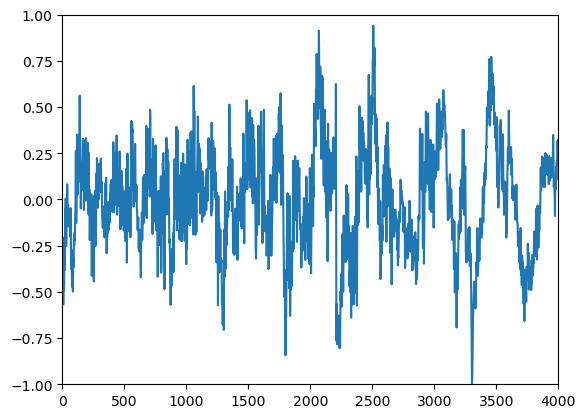

In [260]:
plt.plot(data[0])
plt.ylim(-1,1)
plt.xlim(0,500*8)

In [259]:
np.std(datad['eeg_rest'][0])*2

75.76686096191406

(0.0, 4000.0)

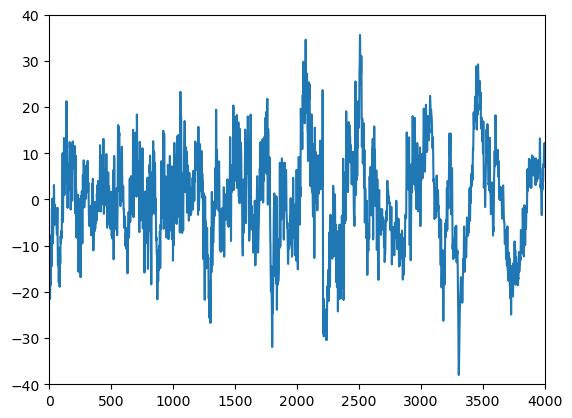

In [257]:
plt.plot(datad['eeg_rest'][0])
plt.ylim(-40,40)
plt.xlim(0,500*8)

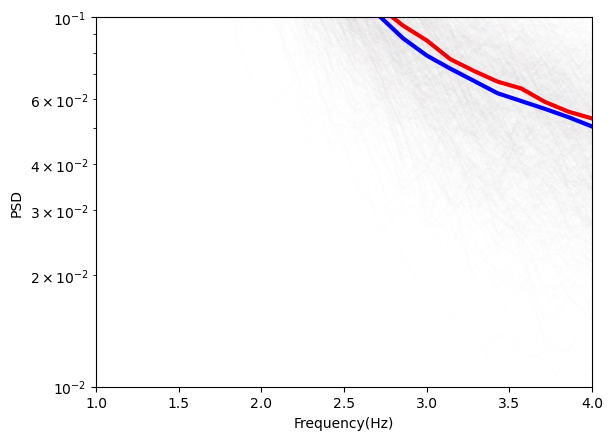

In [279]:
import scipy
## DELTA BAND + STO CONSIDERANDO ANCHE CANALI CON ARTIFACTS
colors = cm.Reds(np.linspace(0,1,len(babies)))
#data = scipy.io.loadmat('BB5 silence1 (continuous).mat')

sample_rate = 500
nn = sample_rate*7
total_mean_1 = []

for r in range(len(babies)):
    #print(os.getcwd())
    sub = babies[r]
    datad = (scipy.io.loadmat('../../BB{}_Filtered (1-100)/Silence (500)/BB{} silence2 (continuous).mat'.format(sub,sub)))
    data = datad['eeg_rest']/(np.std(datad['eeg_rest'],1)[:,np.newaxis])
    kk = []
    for g in range(data.shape[0]):
        x,p = signal.welch(data[g], fs = sample_rate, nperseg =nn,)
        kk.append(p)
        plt.plot(x,p , color =colors[r], alpha = 0.005)
    kk = np.array(kk)
    mean_p = np.mean(kk,0)
    #plt.plot(x,mean_p, color = colors[r], alpha = .5)
    total_mean_1.append(mean_p)
    
## mi sta plottando anche bad channels
total_mean_1 = np.mean(np.array(total_mean_1),0)
plt.plot(x, total_mean_1, color = 'red', lw = 3)

colors = cm.Blues(np.linspace(0,1,len(babies)))


import scipy
#data = scipy.io.loadmat('BB5 silence1 (continuous).mat')

sample_rate = 500

total_mean_2 = []
for r in range(len(babies)):
    #print(os.getcwd())
    sub = babies[r]
    data = (scipy.io.loadmat('../../BB{}_Filtered (1-100)/Silence (500)/BB{} silence1 (continuous).mat'.format(sub,sub)))
    data = data['eeg_rest']/(np.std(data['eeg_rest'],1)[:,np.newaxis])
    kk = []
    for g in range(data.shape[0]):
        x,p = signal.welch(data[g], fs = sample_rate, nperseg =nn,)
        kk.append(p)
        plt.plot(x,p , color =colors[r], alpha = 0.005)
    kk = np.array(kk)
    mean_p = np.mean(kk,0)
    #plt.plot(x,mean_p, color = colors[r], alpha = .5)
    total_mean_2.append(mean_p)
    


total_mean_2 = np.mean(np.array(total_mean_2),0)
plt.plot(x, total_mean_2, color = 'blue', lw = 3)

## mi sta plottando anche bad channels
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Frequency(Hz)')
plt.ylabel('PSD')
plt.xlim(1,4)
plt.yscale('log')
plt.ylim(10**-2,10**-1);

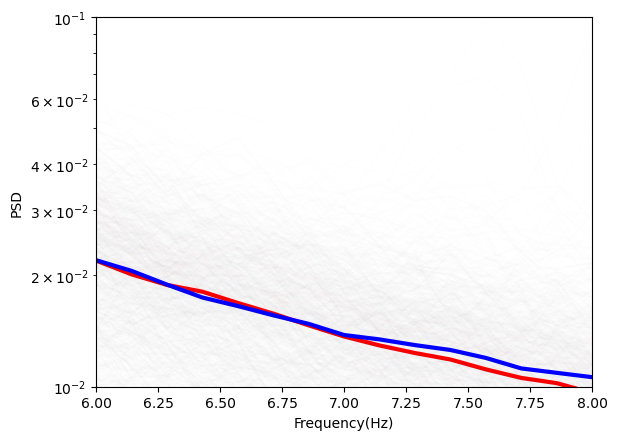

In [277]:
import scipy

colors = cm.Reds(np.linspace(0,1,len(babies)))
#data = scipy.io.loadmat('BB5 silence1 (continuous).mat')

sample_rate = 500
nn = sample_rate*7
total_mean_1 = []

for r in range(len(babies)):
    #print(os.getcwd())
    sub = babies[r]
    datad = (scipy.io.loadmat('../../BB{}_Filtered (1-100)/Silence (500)/BB{} silence2 (continuous).mat'.format(sub,sub)))
    data = datad['eeg_rest']/(np.std(datad['eeg_rest'],1)[:,np.newaxis])
    kk = []
    for g in range(data.shape[0]):
        x,p = signal.welch(data[g], fs = sample_rate, nperseg =nn,)
        kk.append(p)
        plt.plot(x,p , color =colors[r], alpha = 0.005)
    kk = np.array(kk)
    mean_p = np.mean(kk,0)
    #plt.plot(x,mean_p, color = colors[r], alpha = .5)
    total_mean_1.append(mean_p)
    
## mi sta plottando anche bad channels
total_mean_1 = np.mean(np.array(total_mean_1),0)
plt.plot(x, total_mean_1, color = 'red', lw = 3)

colors = cm.Blues(np.linspace(0,1,len(babies)))


import scipy
#data = scipy.io.loadmat('BB5 silence1 (continuous).mat')

sample_rate = 500

total_mean_2 = []
for r in range(len(babies)):
    #print(os.getcwd())
    sub = babies[r]
    data = (scipy.io.loadmat('../../BB{}_Filtered (1-100)/Silence (500)/BB{} silence1 (continuous).mat'.format(sub,sub)))
    data = data['eeg_rest']/(np.std(data['eeg_rest'],1)[:,np.newaxis])
    kk = []
    for g in range(data.shape[0]):
        x,p = signal.welch(data[g], fs = sample_rate, nperseg =nn,)
        kk.append(p)
        plt.plot(x,p , color =colors[r], alpha = 0.005)
    kk = np.array(kk)
    mean_p = np.mean(kk,0)
    #plt.plot(x,mean_p, color = colors[r], alpha = .5)
    total_mean_2.append(mean_p)
    


total_mean_2 = np.mean(np.array(total_mean_2),0)
plt.plot(x, total_mean_2, color = 'blue', lw = 3)

## mi sta plottando anche bad channels
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Frequency(Hz)')
plt.ylabel('PSD')
plt.xlim(6,8)
plt.yscale('log')
plt.ylim(10**-2,10**-1);

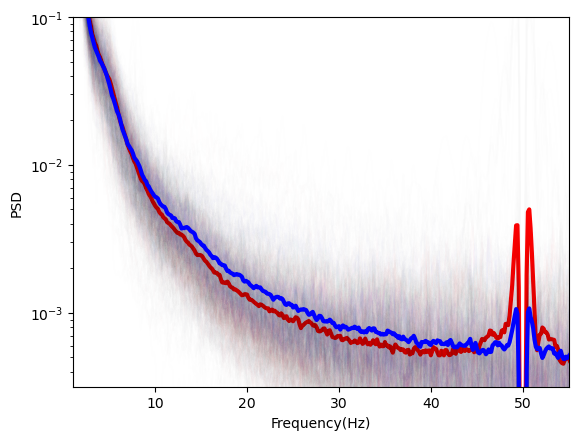

In [278]:
import scipy

colors = cm.Reds(np.linspace(0,1,len(babies)))
#data = scipy.io.loadmat('BB5 silence1 (continuous).mat')

sample_rate = 500
nn = sample_rate*7
total_mean_1 = []

for r in range(len(babies)):
    #print(os.getcwd())
    sub = babies[r]
    datad = (scipy.io.loadmat('../../BB{}_Filtered (1-100)/Silence (500)/BB{} silence2 (continuous).mat'.format(sub,sub)))
    data = datad['eeg_rest']/(np.std(datad['eeg_rest'],1)[:,np.newaxis])
    kk = []
    for g in range(data.shape[0]):
        x,p = signal.welch(data[g], fs = sample_rate, nperseg =nn,)
        kk.append(p)
        plt.plot(x,p , color =colors[r], alpha = 0.005)
    kk = np.array(kk)
    mean_p = np.mean(kk,0)
    #plt.plot(x,mean_p, color = colors[r], alpha = .5)
    total_mean_1.append(mean_p)
    
## mi sta plottando anche bad channels
total_mean_1 = np.mean(np.array(total_mean_1),0)
plt.plot(x, total_mean_1, color = 'red', lw = 3)

colors = cm.Blues(np.linspace(0,1,len(babies)))


import scipy
#data = scipy.io.loadmat('BB5 silence1 (continuous).mat')

sample_rate = 500

total_mean_2 = []
for r in range(len(babies)):
    #print(os.getcwd())
    sub = babies[r]
    data = (scipy.io.loadmat('../../BB{}_Filtered (1-100)/Silence (500)/BB{} silence1 (continuous).mat'.format(sub,sub)))
    data = data['eeg_rest']/(np.std(data['eeg_rest'],1)[:,np.newaxis])
    kk = []
    for g in range(data.shape[0]):
        x,p = signal.welch(data[g], fs = sample_rate, nperseg =nn,)
        kk.append(p)
        plt.plot(x,p , color =colors[r], alpha = 0.005)
    kk = np.array(kk)
    mean_p = np.mean(kk,0)
    #plt.plot(x,mean_p, color = colors[r], alpha = .5)
    total_mean_2.append(mean_p)
    


total_mean_2 = np.mean(np.array(total_mean_2),0)
plt.plot(x, total_mean_2, color = 'blue', lw = 3)

## mi sta plottando anche bad channels
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Frequency(Hz)')
plt.ylabel('PSD')
plt.xlim(1,55)
plt.yscale('log')
plt.ylim(10**-3.5,10**-1);

(0.0001, 10)

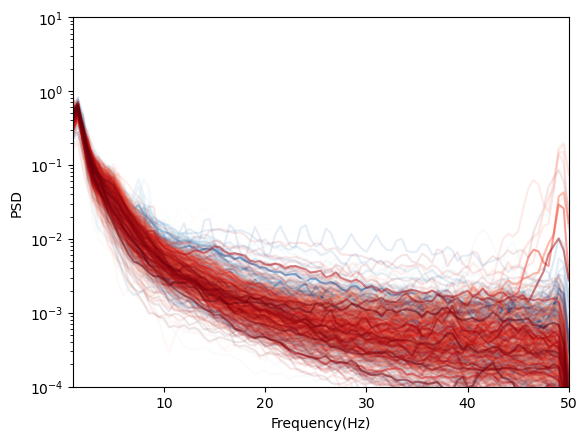

In [262]:
import scipy

colors = cm.Blues(np.linspace(0,1,len(babies)))
#data = scipy.io.loadmat('BB5 silence1 (continuous).mat')

sample_rate = 500
nn = sample_rate*2

for r in range(len(babies)):
    #print(os.getcwd())
    sub = babies[r]
    data = (scipy.io.loadmat('../../BB{}_Filtered (1-100)/Silence (500)/BB{} silence1 (continuous).mat'.format(sub,sub)))
    data = data['eeg_rest']/(np.std(data['eeg_rest'],1)[:,np.newaxis])
    kk = []
    for g in range(data.shape[0]):
        x,p = signal.welch(data[g], fs = sample_rate, nperseg =nn,)
        kk.append(p)
        plt.plot(x,p , color =colors[r], alpha = 0.1)
    kk = np.array(kk)
    mean_p = np.mean(kk,0)
    plt.plot(x,mean_p, color = colors[r], alpha = .5)
    
## mi sta plottando anche bad channels

colors = cm.Reds(np.linspace(0,1,len(babies)))


import scipy
#data = scipy.io.loadmat('BB5 silence1 (continuous).mat')

sample_rate = 500
#nn = sample_rate*2

for r in range(len(babies)):
    #print(os.getcwd())
    sub = babies[r]
    data = (scipy.io.loadmat('../../BB{}_Filtered (1-100)/Silence (500)/BB{} silence2 (continuous).mat'.format(sub,sub)))
    data = data['eeg_rest']/(np.std(data['eeg_rest'],1)[:,np.newaxis])
    kk = []
    for g in range(data.shape[0]):
        x,p = signal.welch(data[g], fs = sample_rate, nperseg =nn,)
        kk.append(p)
        plt.plot(x,p , color =colors[r], alpha = 0.1)
    kk = np.array(kk)
    mean_p = np.mean(kk,0)
    plt.plot(x,mean_p, color = colors[r], alpha = .5)
    
## mi sta plottando anche bad channels
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency(Hz)')
plt.ylabel('PSD')
plt.xlim(1,50)
plt.ylim(10**-4,10)
    ## MA QUESTI SONO GIà FILTRATI???? TRA THETA E ALPHA???
    ## MA QUESTI SONO GIà FILTRATI???? TRA THETA E ALPHA???

(0.001, 10)

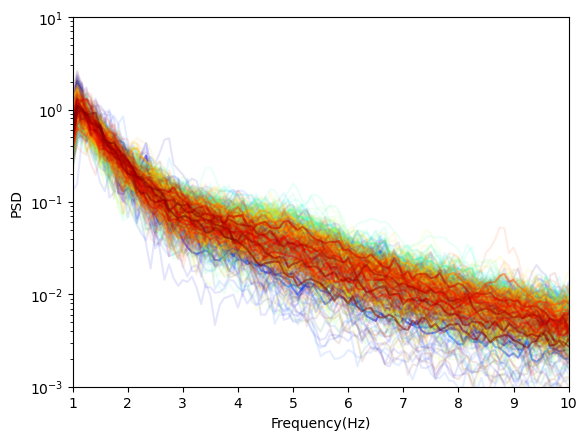

In [226]:
import scipy
#data = scipy.io.loadmat('BB5 silence1 (continuous).mat')

sample_rate = 500
nn = sample_rate*12

for r in range(len(babies)):
    #print(os.getcwd())
    sub = babies[r]
    data = (scipy.io.loadmat('../../BB{}_Filtered (1-100)/Silence (500)/BB{} silence2 (continuous).mat'.format(sub,sub)))
    data = data['eeg_rest']/(np.std(data['eeg_rest'],1)[:,np.newaxis])
    kk = []
    for g in range(data.shape[0]):
        x,p = signal.welch(data[g], fs = sample_rate, nperseg =nn,)
        kk.append(p)
        plt.plot(x,p , color =colors[r], alpha = 0.1)
    kk = np.array(kk)
    mean_p = np.mean(kk,0)
    plt.plot(x,mean_p, color = colors[r], alpha = .5)
    
## mi sta plottando anche bad channels
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency(Hz)')
plt.ylabel('PSD')
plt.xlim(1,10)
plt.ylim(10**-3,10)
    ## MA QUESTI SONO GIà FILTRATI???? TRA THETA E ALPHA???

## loro hanno guardato alle differenze credo
## check il loro paper

In [43]:
from scipy import signal

In [115]:
signn = data['eeg_rest']

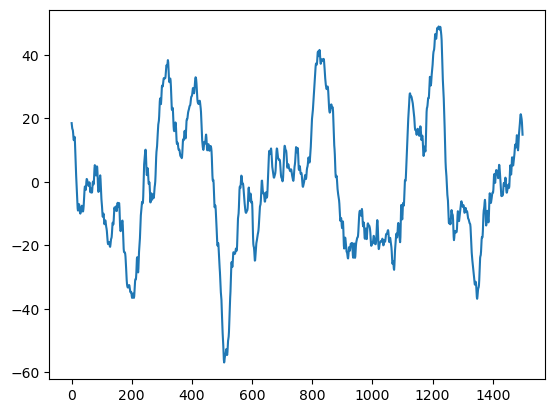

In [55]:
plt.plot(signn[5, :500*3])

In [58]:
signn.shape

(10, 90143)

In [62]:
(signn/np.std(signn,1)[:,np.newaxis])

(10, 90143)

Text(0, 0.5, 'PSD')

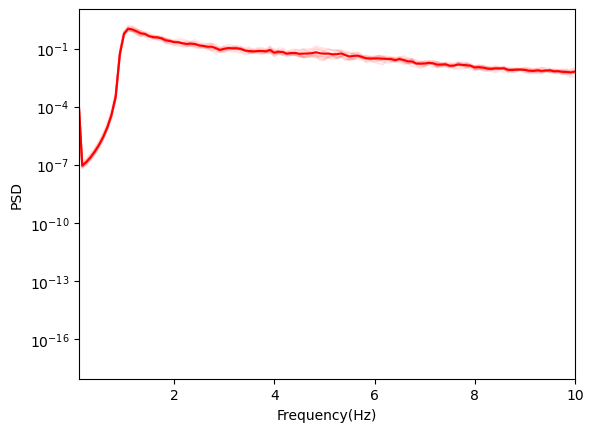

In [118]:
sample_rate = 500
nn = sample_rate*12
renorm = (signn/np.std(signn,1)[:,np.newaxis])
kk = []
for g in range(signn.shape[0]):
    x,p = signal.welch(renorm[g,:], fs = sample_rate, nperseg =nn,)
    kk.append(p)
    plt.plot(x,p , color ='red', alpha = 0.1)
kk = np.array(kk)
mean_p = np.mean(kk,0)
plt.plot(x,mean_p, color = 'red')
plt.xlim(0.1,10);
plt.yscale('log')
plt.xlabel('Frequency(Hz)')
plt.ylabel('PSD')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import powerlaw as pwl
from scipy import signal

In [78]:
pwd

'C:\\Users\\Benedetta\\Downloads\\NewbornEEGData-20220203T094950Z-001\\NewbornEEGData\\BB5_Filtered (1-100)\\Silence (500)'

In [203]:
os.chdir('../../../../../Downloads/New_datasets-20240309T152559Z-001/New_datasets/')
##NUOVI DATASETS!!!!!

In [81]:
bbs1=[int(x) for x in open("./bbs_s1.dat", "r").read().split("\n")]
bbs2=[int(x) for x in open("./bbs_s2.dat", "r").read().split("\n")]

bbs1=np.array(bbs1) #The group of babies for silence 1  
bbs2=np.array(bbs2) #The group of babies for silence 2

In [205]:
babies = np.array(list(set(bbs1) or set(bbs2)))


In [83]:
num = babies[0]
sil = 1
fl1=pd.read_table("./trials_silence"+str(sil)+"/bb"+str(num)+"s"+str(sil)+".dat", sep="\s+", header = None)
fl1 = np.array(fl1)

In [84]:
fl1.shape

(90143, 8)

In [85]:
renorm.shape

(10, 90143)

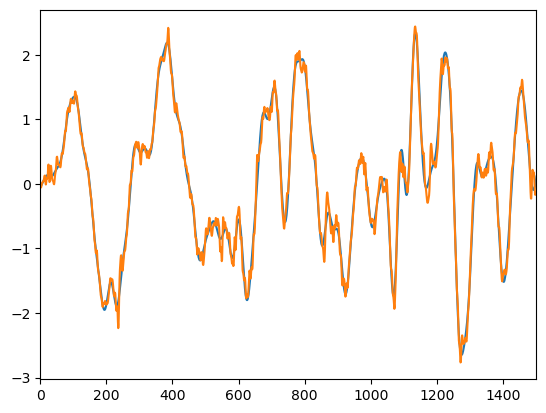

In [86]:
plt.plot(fl1[:500*7,3])
plt.plot(renorm[3,:500*7])
plt.xlim(0,1500);

In [209]:
sample_rate = 500
nn = sample_rate*12
from matplotlib import cm
colors = cm.jet(np.linspace(0,1,len(babies)))
for r in range(len(babies)):
    num = babies[r]
    sil = 1
    fl1=pd.read_table("./trials_silence"+str(sil)+"/bb"+str(num)+"s"+str(sil)+".dat", sep="\s+", header = None)
    fl1 = np.array(fl1)

    kk = []
    for g in range(fl1.shape[1]):
        x,p = signal.welch(fl1[:,g], fs = sample_rate, nperseg =nn,)
        kk.append(p)
        plt.plot(x,p , color =colors[r], alpha = 0.1)
    kk = np.array(kk)
    mean_p = np.mean(kk,0)
    plt.plot(x,mean_p, color = colors[r])
#plt.xlim(2,8);
plt.yscale('log')
plt.xlabel('Frequency(Hz)')
plt.ylabel('PSD')
plt.xscale('log')
plt.xlim(0.1,100)
plt.ylim(10**-6,10)


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x0000019B0324B310> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x0000019B18719670> (for post_execute):



KeyboardInterrupt

